        date state  confirmed  deaths  confirmed_per_100k_inhabitants  \
0 2021-12-06    SP       4102     148                    1.168295e+09   
1 2021-12-06    SP        623      19                    1.752954e+09   
2 2021-12-06    SP       3622     113                    9.883213e+08   
3 2021-12-06    SP        669      29                    8.137696e+08   
4 2021-12-06    SP       2088      52                    1.110166e+09   

   death_rate  
0       361.0  
1       305.0  
2       312.0  
3       433.0  
4       249.0  


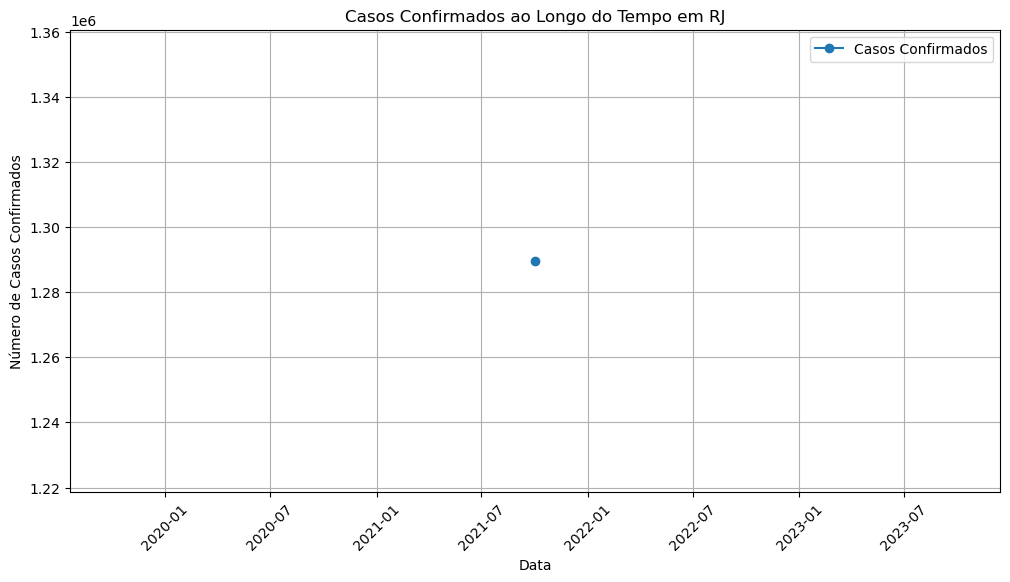

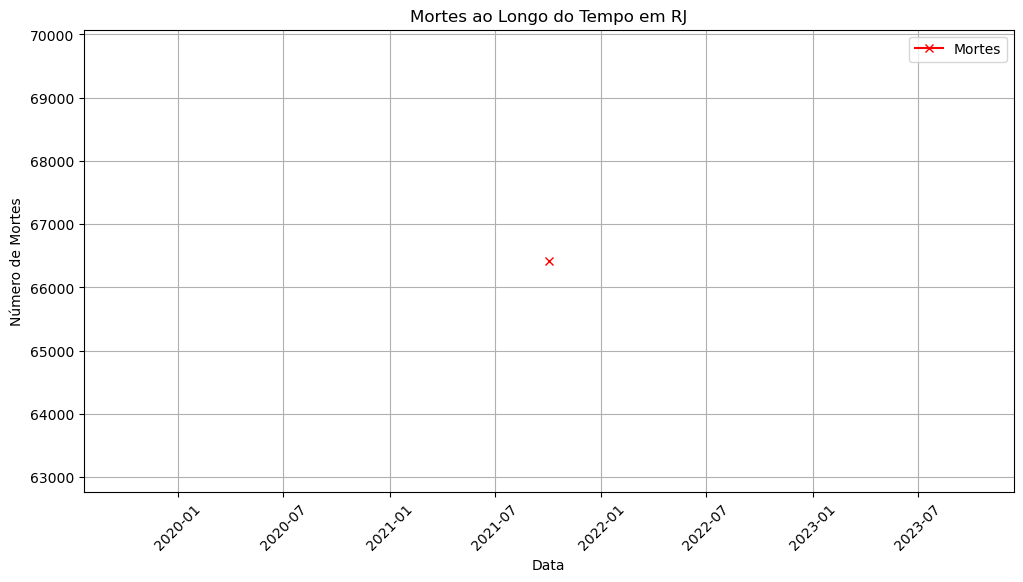

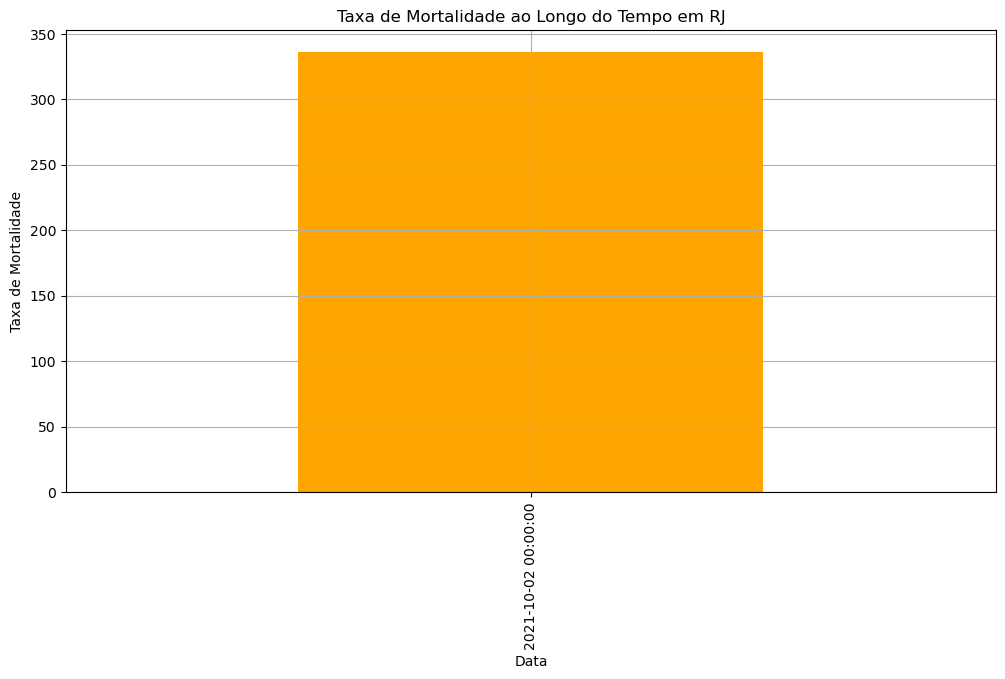

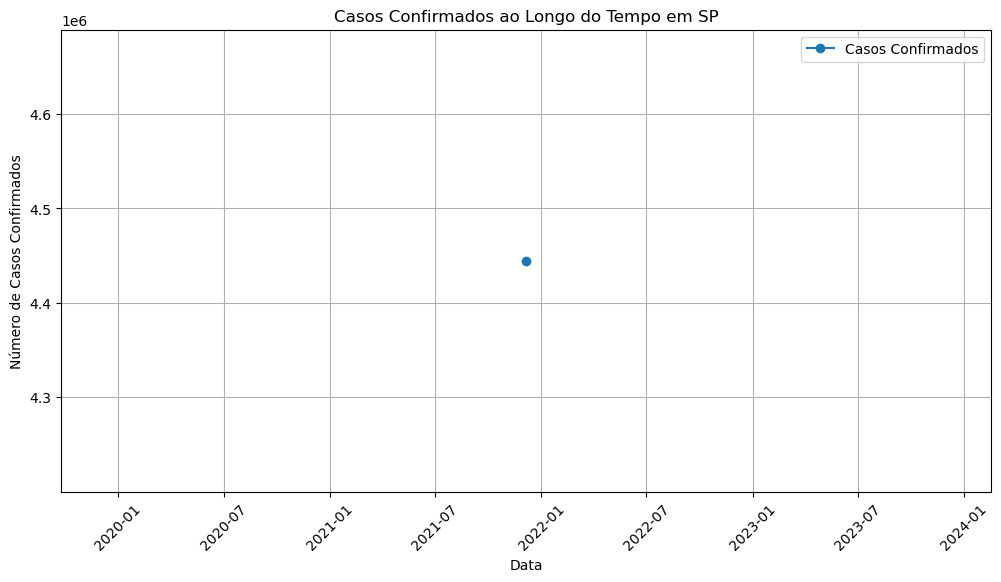

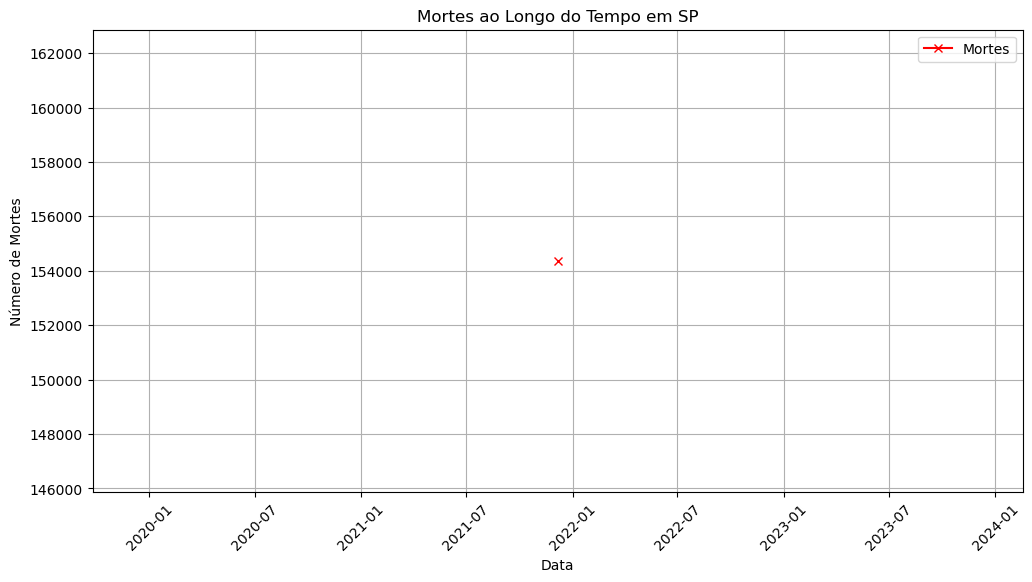

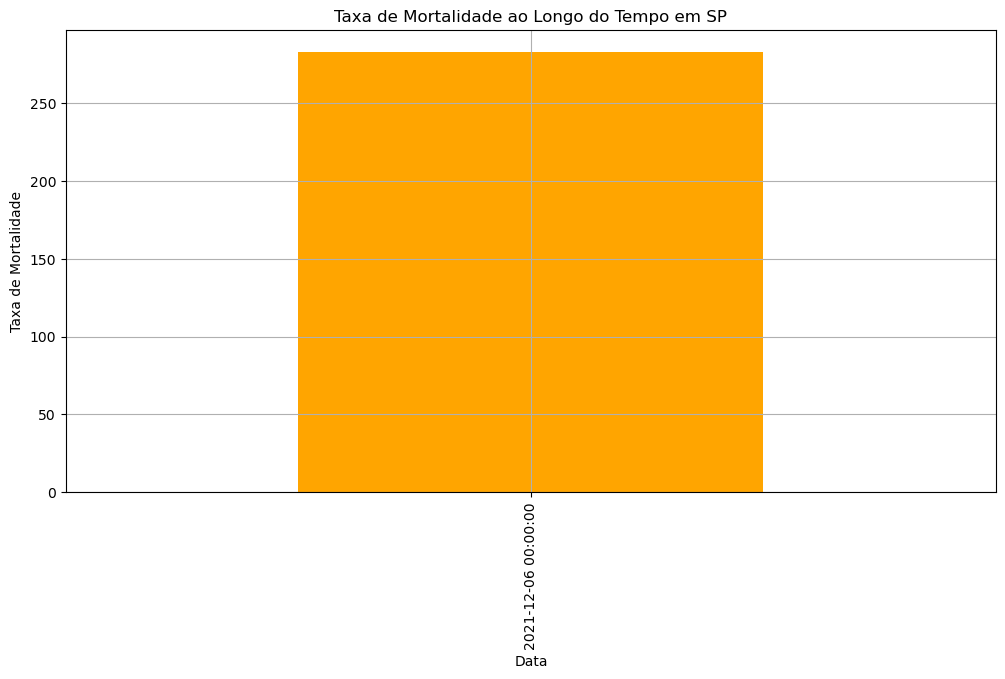

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Ler o arquivo Excel
df = pd.read_excel('dadoscovid.xlsx')

# Mostrar as primeiras linhas do dataframe
print(df.head())

# Filtrar os dados para os estados específicos (RJ e SP)
estados_especificos = df[df['state'].isin(['RJ', 'SP'])]

# Converter a coluna 'date' para datetime
estados_especificos['date'] = pd.to_datetime(estados_especificos['date'])

# Função para plotar gráficos para um estado específico
def plot_graficos(estado):
    estado_df = estados_especificos[estados_especificos['state'] == estado]
    
    # Agrupar por data e somar os casos confirmados e mortes
    dados_agrupados = estado_df.groupby('date').sum().reset_index()

    # Gráfico de linha para casos confirmados ao longo do tempo
    plt.figure(figsize=(12, 6))
    plt.plot(dados_agrupados['date'], dados_agrupados['confirmed'], marker='o', label='Casos Confirmados')
    plt.title(f'Casos Confirmados ao Longo do Tempo em {estado}')
    plt.xlabel('Data')
    plt.ylabel('Número de Casos Confirmados')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    # Gráfico de linha para mortes ao longo do tempo
    plt.figure(figsize=(12, 6))
    plt.plot(dados_agrupados['date'], dados_agrupados['deaths'], marker='x', color='red', label='Mortes')
    plt.title(f'Mortes ao Longo do Tempo em {estado}')
    plt.xlabel('Data')
    plt.ylabel('Número de Mortes')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    # Gráfico de barras para taxa de mortalidade por 100k habitantes
    plt.figure(figsize=(12, 6))
    taxa_mortalidade_por_100k = estado_df.groupby('date')['death_rate'].mean()
    taxa_mortalidade_por_100k.plot(kind='bar', color='orange')
    plt.title(f'Taxa de Mortalidade ao Longo do Tempo em {estado}')
    plt.xlabel('Data')
    plt.ylabel('Taxa de Mortalidade')
    plt.grid(True)
    plt.show()

# Plotar gráficos para RJ
plot_graficos('RJ')

# Plotar gráficos para SP
plot_graficos('SP')
